In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, cm
# import corner

%matplotlib inline

### Load data

In [2]:
RAVE = np.genfromtxt("../data/RAVE/FINAL_RAVE_GAIA_ID.dat", names=True)

log_flat = np.genfromtxt("../data/TGAS/gaia_wide_binaries_TGAS_plx_exponential_cleaned.txt", names=True)
power_law = np.genfromtxt("../data/TGAS/gaia_wide_binaries_TGAS_plx_exponential_a_power_law_cleaned.txt", names=True)

In [3]:
log_flat_good = log_flat[log_flat['P_posterior'] > 0.99]
power_law_good = power_law[power_law['P_posterior'] > 0.99]

### Match catalogs

In [4]:
RAVE_ID = RAVE['Source'].astype('float64')


def get_ids(catalog):
    
    idx_rave_1 = []
    idx_rave_2 = []
    idx_catalog = []
    
    for i, obj in enumerate(catalog):

        idx_tmp_1 = np.array([])
        idx_tmp_2 = np.array([])

        idx_tmp_1 = np.where(RAVE_ID == obj['source_ID_1'])[0]
        idx_tmp_2 = np.where(RAVE_ID == obj['source_ID_2'])[0]

        # To get rid of NaNs
        idx_tmp = []
        for j in idx_tmp_1:
            if not np.isnan(RAVE[j]['SNR_K']) and np.any(RAVE[j]['Source'] != RAVE[idx_tmp_2]['Source']):
                idx_tmp.append(j)
        idx_tmp_1 = idx_tmp

        idx_tmp = []
        for j in idx_tmp_2:
            if not np.isnan(RAVE[j]['SNR_K']):
                idx_tmp.append(j)
        idx_tmp_2 = idx_tmp
                
        
        if len(idx_tmp_1) == 0 or len(idx_tmp_2) == 0:
            continue

            
        if len(idx_tmp_1) == 1:
            idx_rave_1.append(idx_tmp_1[0])
        else:
            idx_rave_1.append(idx_tmp_1[np.argmax(RAVE[idx_tmp_1]['SNR_K'])])

        if len(idx_tmp_2) == 1:
            idx_rave_2.append(idx_tmp_2[0])
        else:
            idx_rave_2.append(idx_tmp_2[np.argmax(RAVE[idx_tmp_2]['SNR_K'])])

        idx_catalog.append(i)
            
    return idx_rave_1, idx_rave_2, idx_catalog                    


In [5]:
idx_power_law_1, idx_power_law_2, idx_power_law = get_ids(power_law)
idx_log_flat_1, idx_log_flat_2, idx_log_flat = get_ids(log_flat)

print(len(idx_power_law_1))
print(len(idx_log_flat_1))

522
791


### Plot RVs to make sure they match

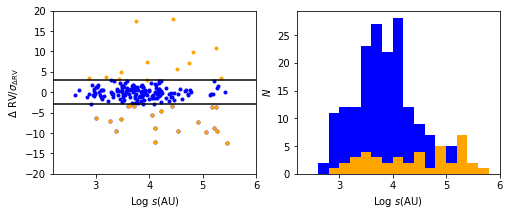

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

idx_cat = power_law['P_posterior'][idx_power_law] > 0.99


# RV difference
delta_RV = RAVE['HRV'][idx_power_law_1][idx_cat] - RAVE['HRV'][idx_power_law_2][idx_cat]
delta_RV_err = np.sqrt(RAVE['eHRV'][idx_power_law_1][idx_cat]**2 + RAVE['eHRV'][idx_power_law_2][idx_cat]**2)
delta_RV_sigma = (RAVE['HRV'][idx_power_law_1][idx_cat] - RAVE['HRV'][idx_power_law_2][idx_cat]) / delta_RV_err
proj_sep = power_law['proj_sep'][idx_power_law][idx_cat]

idx_in_3sigma = delta_RV_sigma < 3.0
idx_out_3sigma = abs(delta_RV_sigma) >= 3.0


ax[0].scatter(np.log10(proj_sep[idx_in_3sigma]), delta_RV_sigma[idx_in_3sigma], marker='.', color='b')
ax[0].scatter(np.log10(proj_sep[idx_out_3sigma]), delta_RV_sigma[idx_out_3sigma], marker='.', color='orange')

ax[0].axhline(-3.0, color='k')
ax[0].axhline(3.0, color='k')

ax[0].set_xlim(2.2,6)
ax[0].set_ylim(-20,20)

ax[0].set_xlabel(r"${\rm Log}\ s ({\rm AU})$")
ax[0].set_ylabel(r"$\Delta\ {\rm RV} / \sigma_{\Delta {\rm RV}}$")



# Histograms
bins = np.linspace(2.2, 6.0, 20)

ax[1].hist(np.log10(proj_sep[idx_in_3sigma]), bins=bins, color='b')
ax[1].hist(np.log10(proj_sep[idx_out_3sigma]), bins=bins, color='orange')

ax[1].set_xlim(2.2,6)

ax[1].set_xlabel(r"${\rm Log}\ s ({\rm AU})$")
ax[1].set_ylabel(r"$N$")

plt.show()

### Plot metallicities

In [104]:
# corner.hist2d?
print(RAVE.dtype)

[('Source', '<f8'), ('RAVE_OBS_ID_1', '<f8'), ('hip', '<f8'), ('tycho2_id', '<f8'), ('ra', '<f8'), ('ra_error', '<f8'), ('dec', '<f8'), ('dec_error', '<f8'), ('parallax_1', '<f8'), ('parallax_error', '<f8'), ('pmra', '<f8'), ('pmra_error', '<f8'), ('pmdec', '<f8'), ('pmdec_error', '<f8'), ('phot_g_mean_flux', '<f8'), ('phot_g_mean_flux_error', '<f8'), ('phot_g_mean_mag', '<f8'), ('RAVEID', '<f8'), ('RAdeg', '<f8'), ('DEdeg', '<f8'), ('HRV', '<f8'), ('eHRV', '<f8'), ('StdDev_HRV', '<f8'), ('MAD_HRV', '<f8'), ('STN_SPARV', '<f8'), ('SNR_K', '<f8'), ('Teff_K', '<f8'), ('Teff_N_K', '<f8'), ('eTeff_K', '<f8'), ('MAD_Teff_K', '<f8'), ('StdDev_Teff_K', '<f8'), ('logg_K', '<f8'), ('logg_N_K', '<f8'), ('elogg_K', '<f8'), ('MAD_logg_K', '<f8'), ('StdDev_logg_K', '<f8'), ('Met_K', '<f8'), ('Met_N_K', '<f8'), ('eMet_K', '<f8'), ('MAD_Met_K', '<f8'), ('StdDev_Met_K', '<f8'), ('ALGO_CONV', '<f8'), ('Teff_IR', '<f8'), ('eTeff_IR', '<f8'), ('IR_direct', '<f8'), ('Mg', '<f8'), ('Al', '<f8'), ('Si', '<f

In [118]:
def plot_species(ax, name):
    
    # Plot background contours
    RAVE_ran_species = RAVE[~np.isnan(RAVE[name])][name]
    RAVE_ran_species_1 = np.random.choice(RAVE_ran_species, size=10000)
    RAVE_ran_species_2 = np.random.choice(RAVE_ran_species, size=10000)
    cmap = cm.PRGn
    contourf_kwargs = {"alpha" : 0.1, "colors" : cmap}
    corner.hist2d(RAVE_ran_species_1, RAVE_ran_species_2, ax=ax, bins=40, smooth = 0.8,
                  plot_datapoints=False, plot_contours=True, plot_density=False,
                  fill_contours=True, nofill_contours=False,
                  **contourf_kwargs)
    
    # Add lines for zero
    ax.axhline(0.0, color='k', alpha=0.3, linestyle='--')
    ax.axvline(0.0, color='k', alpha=0.3, linestyle='--')

    # Plot the 1-1 line
    ax.plot([-1,1], [-1,1], color='k', linestyle='-', alpha=0.5)
    
    # Plot points
    delta_RV = RAVE['HRV'][idx_power_law_1][idx_cat] - RAVE['HRV'][idx_power_law_2][idx_cat]
    delta_RV_err = np.sqrt(RAVE['eHRV'][idx_power_law_1][idx_cat]**2 + RAVE['eHRV'][idx_power_law_2][idx_cat]**2)
    delta_RV_sigma = (RAVE['HRV'][idx_power_law_1][idx_cat] - RAVE['HRV'][idx_power_law_2][idx_cat]) / delta_RV_err

    
    idx_good = np.where(delta_RV_sigma < 3.0)[0]
    ax.scatter(RAVE[name][idx_power_law_1][idx_cat][idx_good], RAVE[name][idx_power_law_2][idx_cat][idx_good], 
               marker='.', s=20, zorder=1000, color='r')

    idx_bad = np.where(delta_RV_sigma >= 3.0)[0]
    ax.scatter(RAVE[name][idx_power_law_1][idx_cat][idx_bad], RAVE[name][idx_power_law_2][idx_cat][idx_bad], 
               marker='.', s=20, zorder=1000, color='r')    
    
    # Add species name
    ax.text(-0.8, 0.8, name)
    
    # Work on axis, axis-ratios
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_aspect('equal')


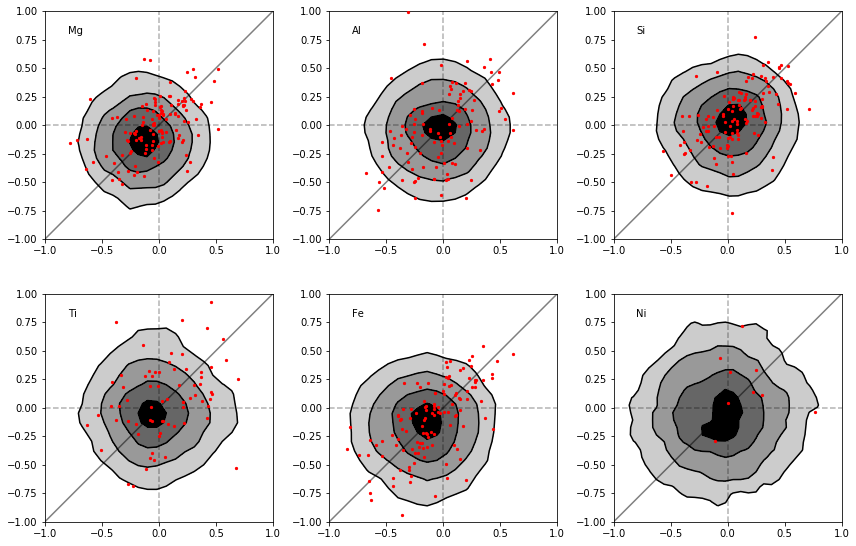

In [120]:
fig, ax = plt.subplots(2, 3, figsize=(12,8))


species = ["Mg", "Al", "Si", "Ti", "Fe", "Ni"]

for i in np.arange(6):

    j = int(i/3)
    k = i%3

    plot_species(ax[j,k], species[i])


    
plt.tight_layout()

plt.savefig("../figures/RAVE_metallicity_compare.pdf")
# plt.show()

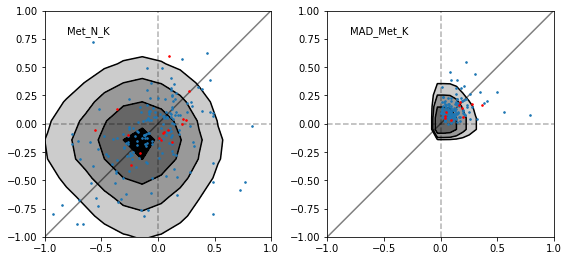

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(8,5))


species = ["Met_N_K", "MAD_Met_K"]



for i in np.arange(2):

    plot_species(ax[i], species[i])


    
plt.tight_layout()

plt.show()

### Notes from RAVE DR5 paper

There is a quality flag for determining abundances. We want "0" which means the spectrum converged.



### Now, let's load up data from LAMOST

In [44]:
dtype = [('input_id', '<f8'), ('input_ra', '<f8'), ('input_dec', '<f8'), ('dist', '<f8'), ('obsid', '<f8'), 
         ('ra', '<f8'), ('dec', '<f8'), ('class', 'S8'), ('subclass', 'S8'), ('rv', '<f8'), ('logg', '<f8'), 
         ('logg_err', '<f8'), ('teff', '<f8'), ('teff_err', '<f8'), ('feh', '<f8'), ('feh_err', '<f8')]
data = np.genfromtxt("../data/LAMOST/LAMOST_match.csv", delimiter=',', skip_header=20, dtype=dtype)

dtype = [('ID', '<i8'), ('ra', '<f8'), ('dec', '<f8')]
coor = np.genfromtxt("../data/TGAS/coor.dat", dtype=dtype)

In [45]:
print(coor.dtype)
print(data.dtype)


[('ID', '<i8'), ('ra', '<f8'), ('dec', '<f8')]
[('input_id', '<f8'), ('input_ra', '<f8'), ('input_dec', '<f8'), ('dist', '<f8'), ('obsid', '<f8'), ('ra', '<f8'), ('dec', '<f8'), ('class', 'S8'), ('subclass', 'S8'), ('rv', '<f8'), ('logg', '<f8'), ('logg_err', '<f8'), ('teff', '<f8'), ('teff_err', '<f8'), ('feh', '<f8'), ('feh_err', '<f8')]


In [46]:
# Get catalog numbers for LAMOST data
for i in np.arange(len(data)):
    
    # Find difference between ra's and dec's
    delta = (data['input_ra'][i]-coor['ra'])**2 + (data['input_dec'][i] - coor['dec'])**2
    
    # Find corresponding catalog index
    idx = np.argmin(delta)
    
    # Change data input_id to coor index
    data['input_id'][i] = coor['ID'][idx]
    
# Sort LAMOST data based on catalog numbers
data = np.sort(data)

In [47]:
# Create a list of all indices with matched items
l = data['input_id'].tolist()
list_repeats = set([x for x in l if l.count(x) > 1])

# Create empty array for new data
LAMOST_both = np.array([],dtype=data.dtype)

# Search through data to see which items are in matched list
for item in data:

    # If item found, append to new array
    if item['input_id'] in list_repeats:
        
        # Now to only select those pairs in which the multiple match is
        # of different stars rather than multiple observatsions of the same
        # star in the pair
        data_tmp = data[np.where(data['input_id'] == item['input_id'])[0]]
        if len(np.unique(data_tmp['input_ra'])) == 2:

            LAMOST_both = np.append(LAMOST_both, item)
print(len(LAMOST_both))

125


In [63]:
idx_pair = np.unique(LAMOST_both['input_id'])

rv_dtype = [('RV_1','f8'), ('RV_2','f8')]
rv = np.zeros(len(idx_pair), dtype=rv_dtype)

Fe_H_dtype = [('Fe_H_1','f8'), ('Fe_H_err_1','f8'), ('Fe_H_2','f8'), ('Fe_H_err_2','f8')]
Fe_H = np.zeros(len(idx_pair), dtype=Fe_H_dtype)

# Cycle through pairs
for i, idx in enumerate(idx_pair):
    
    # Select only data on just this pair
    data_tmp = LAMOST_both[np.where(LAMOST_both['input_id'] == idx)[0]]
    
    # Search for multiple objects of the same idx
    idx_ra = np.unique(data_tmp['input_ra'])
    
    
    # First object in pair
    data_tmp_ra = data_tmp[np.where(data_tmp['input_ra'] == idx_ra[0])[0]]

    if len(data_tmp_ra) == 1:
        rv['RV_1'][i] = data_tmp_ra['rv']
        Fe_H['Fe_H_1'][i] = data_tmp_ra['feh']
        Fe_H['Fe_H_err_1'][i] = data_tmp_ra['feh_err']
    else:
        rv['RV_1'][i] = np.mean(data_tmp_ra['rv'])
        Fe_H['Fe_H_1'][i] = np.mean(data_tmp_ra['feh'])
        Fe_H['Fe_H_err_1'][i] = np.mean(data_tmp_ra['feh_err'])
        
    
    # Second object in pair
    data_tmp_ra = data_tmp[np.where(data_tmp['input_ra'] == idx_ra[1])[0]]

    if len(data_tmp_ra) == 1:
        rv['RV_2'][i] = data_tmp_ra['rv']
        Fe_H['Fe_H_2'][i] = data_tmp_ra['feh']
        Fe_H['Fe_H_err_2'][i] = data_tmp_ra['feh_err']
    else:
        rv['RV_2'][i] = np.mean(data_tmp_ra['rv'])
        Fe_H['Fe_H_2'][i] = np.mean(data_tmp_ra['feh'])
        Fe_H['Fe_H_err_2'][i] = np.mean(data_tmp_ra['feh_err'])




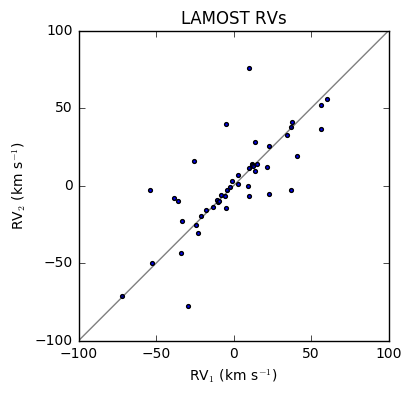

In [76]:
xmin, xmax = -100, 100
ymin, ymax = -100, 100


# Set xlim, ylim
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axes().set_aspect('equal')

# Add 1-1 line
plt.plot([xmin, xmax],[ymin, ymax], color='k', linestyle='-', alpha=0.5)

# Plot data
plt.scatter(rv['RV_1'], rv['RV_2'], marker='.', s=30)

# Add labels and title
plt.title('LAMOST RVs')
plt.xlabel(r"RV$_1$ (km s$^{-1}$)")
plt.ylabel(r"RV$_2$ (km s$^{-1}$)")

plt.savefig("../figures/LAMOST_RV.pdf")
# plt.show()

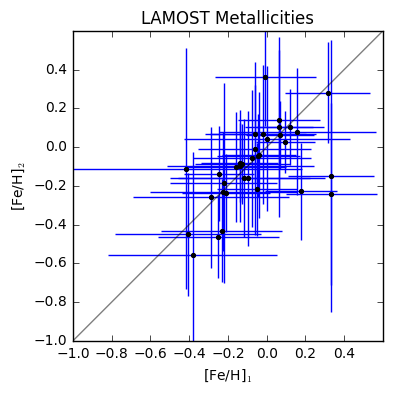

In [89]:
xmin, xmax = -1, 0.6
ymin, ymax = -1, 0.6


# Set xlim, ylim
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axes().set_aspect('equal')

# Add 1-1 line
plt.plot([xmin, xmax],[ymin, ymax], color='k', linestyle='-', alpha=0.5)

# Plot data
plt.errorbar(Fe_H['Fe_H_1'], Fe_H['Fe_H_2'], xerr=Fe_H['Fe_H_err_1'], yerr=Fe_H['Fe_H_err_2'], 
             marker='.', fmt='o', capsize=0)
plt.scatter(Fe_H['Fe_H_1'], Fe_H['Fe_H_2'], marker='.', color='k', s=30, zorder=20)

# Add labels and title
plt.title('LAMOST Metallicities')
plt.xlabel(r"[Fe/H]$_1$")
plt.ylabel(r"[Fe/H]$_2$")

plt.savefig("../figures/LAMOST_metallicities.pdf")
# plt.show()

In [81]:
plt.errorbar?